In [109]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [110]:
style.use('fivethirtyeight')

In [111]:
xs=np.array([1,2,3,4,5,6],dtype=np.float64)

In [112]:
ys=np.array([5,4,6,5,6,7],dtype=np.float64)

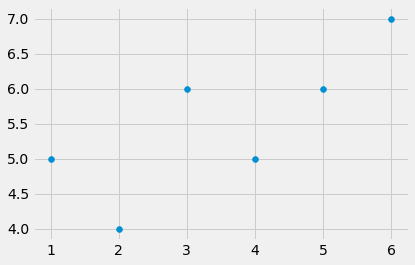

In [113]:
plt.scatter(xs,ys)

In [114]:
#y=mx+b
#m=meanx*meany-meanxy/squaremeanx-meanxsquare
#b=meany-m*meanx

In [115]:
def best_fit_slope_and_intercept(xs,ys):
    
    m=( ((mean(xs)*mean(ys))-mean(xs*ys))/
          ((mean(xs)*mean(xs))-mean(xs*xs)) )
    
    b=mean(ys)-m*mean(xs)
    
    return m,b

m,b=best_fit_slope_and_intercept(xs,ys)
print(m,b)

0.42857142857142866 4.0


In [82]:
def get_regression_line(xs,m,b):
    regression_line=[m*x+b for x in xs]
    return regression_line

In [83]:
regression_line=get_regression_line(xs,m,b)
regression_line

[4.428571428571429,
 4.857142857142858,
 5.2857142857142865,
 5.714285714285714,
 6.142857142857143,
 6.571428571428572]

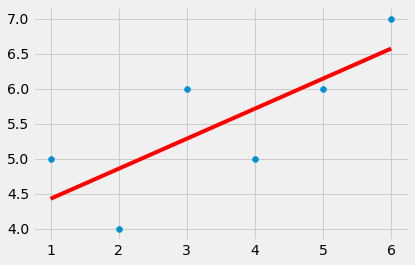

In [84]:
plt.scatter(xs,ys)
plt.plot(xs,regression_line,color='r')
plt.show() #we want to show later with prediction

In [85]:
#our regression model is ready for predictions 
def predict_y_point(x,m,b):
    return m*x+b

In [86]:
predict_x=8
predict_y=predict_y_point(predict_x,m,b)
predict_y

7.428571428571429

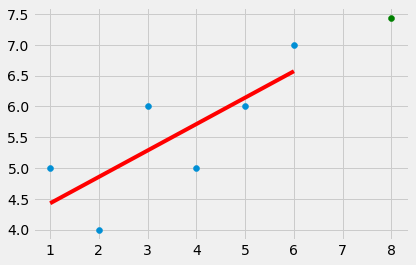

In [87]:
plt.scatter(predict_x,predict_y,color='g')
plt.scatter(xs,ys)
plt.plot(xs,regression_line,color='r')
plt.show()

In [88]:
#accuracy check has to be done

In [89]:
def squared_error(ys_orig,ys_line):
    return sum((ys_line-ys_orig)**2)

In [90]:
def coefficient_of_detemination(ys_orig,ys_line):
    mn=mean(ys_orig)
    y_mean_line=[mn for y in ys_orig]
    
    squared_err_regression=squared_error(ys_orig,ys_line)
    squared_err_y_mean=squared_error(ys_orig,y_mean_line)
    
    r_squared=1-(squared_err_regression/squared_err_y_mean)
    
    return r_squared
    

In [91]:
r_squared=coefficient_of_detemination(ys,regression_line)
r_squared

0.5844155844155845

In [92]:
import random

In [93]:
st=''  #empty string is considered false while non empty a true
st2='fjvbfh'

if st:
    print('st is true')
else:
    print ('st is false')

if st2:
    print('st2 is true')

st is false
st2 is true


In [94]:
def create_dataset(n,variance,step=2,correlation=False):
    val=1
    ys=[]
    
    for i in range(n):
        y=val+random.randrange(-variance,variance)
        ys.append(y)
        
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step
            
    xs=[i for i in range(len(ys))]
    return np.array(xs,dtype=np.float64),np.array(ys,dtype=np.float64)

In [95]:
xs,ys=create_dataset(40,40,correlation='pos')

In [96]:
m,b=best_fit_slope_and_intercept(xs,ys)

In [97]:
regression_line=get_regression_line(xs,m,b)

In [98]:
predict_x=8
predict_y=predict_y_point(predict_x,m,b)

In [100]:
r_squared=coefficient_of_detemination(ys,regression_line)
r_squared

0.5243087894053671

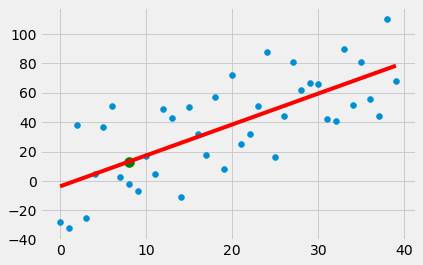

In [108]:
plt.plot(xs,regression_line,color='r')
plt.scatter(predict_x,predict_y,s=100,color='g')
plt.scatter(xs,ys)
plt.show()

In [116]:
#as variance decreses the r square should increse incresing accuracy
xs,ys=create_dataset(40,10,correlation='pos')
m,b=best_fit_slope_and_intercept(xs,ys)
regression_line=get_regression_line(xs,m,b)
predict_x=8
predict_y=predict_y_point(predict_x,m,b)
r_squared=coefficient_of_detemination(ys,regression_line)
r_squared #should increase

0.9549676867136045

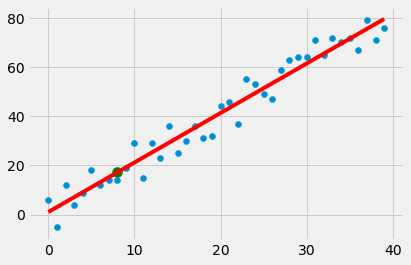

In [117]:
plt.plot(xs,regression_line,color='r')
plt.scatter(predict_x,predict_y,s=100,color='g')
plt.scatter(xs,ys)
plt.show()

In [120]:
#if theres no correlation then data should be scattered randomly
xs,ys=create_dataset(40,10)
m,b=best_fit_slope_and_intercept(xs,ys)
regression_line=get_regression_line(xs,m,b)
predict_x=8
predict_y=predict_y_point(predict_x,m,b)
r_squared=coefficient_of_detemination(ys,regression_line)
r_squared 

3.8061667930855414e-05

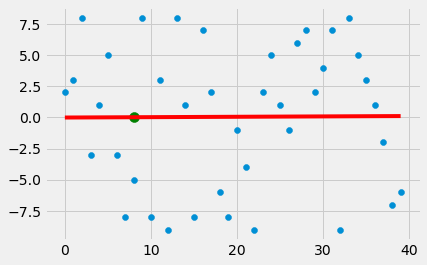

In [121]:
plt.plot(xs,regression_line,color='r')
plt.scatter(predict_x,predict_y,s=100,color='g')
plt.scatter(xs,ys)
plt.show()